In [1]:
import tensorflow as tf
(x_train, y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape=(28, 28, 1)

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [6]:
x_train /=255
x_test /=255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model= Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation= tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2160 - accuracy: 0.9348
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0875 - accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0581 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0464 - accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0356 - accuracy: 0.9881
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0296 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0245 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 35s 19m

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0598 - accuracy: 0.9855


[0.05979708954691887, 0.9854999780654907]

In [25]:
#Predict the Labels-Digits
y_predict=model.predict(x_test)

313/313 [==============================] - 2s 8ms/step


In [26]:
y_predict[12]

array([5.7405620e-17, 1.1651165e-13, 3.1862252e-13, 3.5136456e-08,
       4.2382899e-06, 7.3619834e-12, 2.3387294e-17, 2.5881744e-10,
       1.9141598e-10, 9.9999571e-01], dtype=float32)

In [27]:
y_predict=np.argmax(y_predict, axis=1)


In [28]:
y_predict[12]

9

C:\Users\mdfai\AppData\Local\Temp\ipykernel_1244\1508775839.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


<function matplotlib.pyplot.show(close=None, block=None)>

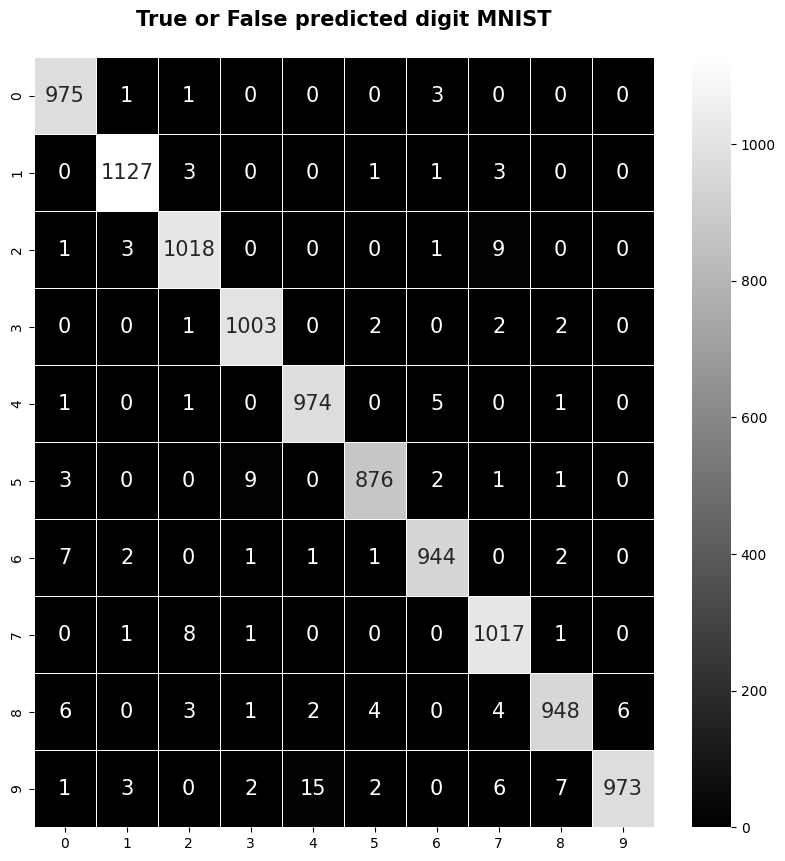

In [33]:
#Confusion Matrix for Digit MNIST

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#Visualization libararies
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

cm=confusion_matrix(y_test,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, annot_kws={'size':15}, linewidth=0.5, fmt='d', cmap='gray')
plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
plt.show

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



1/1 [==============================] - 0s 34ms/step
9


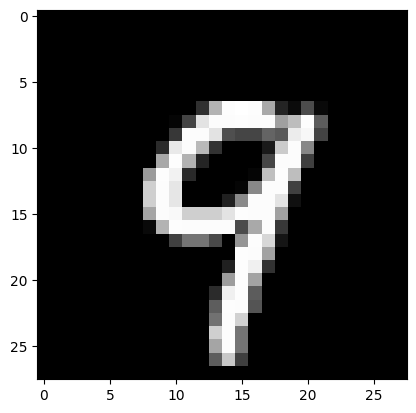

In [49]:
image_index=12
plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
pred= model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [50]:
predict= x_test[image_index].reshape(28,28)